In [1]:
# The following dataset we will look at some basic data cleaning. 
# This is an important part of data science. We typically get a messy data set and need an
# efficient way of cleaning this data
# For this data set we will use oil spill data set 


In [18]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from numpy import unique


In [25]:
data = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', delimiter =',')

In [32]:
data.shape
len(unique(data[:,1]))

297

In [36]:
 for i in range(data.shape[1]):
        print(i , len(unique(data[:,i])))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


In [54]:
df_raw_data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', header =None)

In [55]:
df_raw_data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.0,1000.0,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.0,11500.0,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0


In [56]:
df_raw_data.nunique()


0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64

In [57]:
# we should delete columns with only 1 unique value 

counts = df_raw_data.nunique()

In [58]:
to_drop = [i for i , j in enumerate(counts) if j ==1]     

In [59]:
to_drop

[22]

In [60]:
df_raw_data.drop(to_drop, axis =1, inplace= True)

In [61]:
df_raw_data.nunique()

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64

In [63]:
# we can see that has now gone
# we should also consider columns that have few values 


False

In [74]:
df_raw_data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', header =None)
for i , j in enumerate(df_raw_data.nunique()):
    if (j /df_raw_data.shape[0])*100 <1:
        print (i, j,(j /df_raw_data.shape[0])*100)

21 9 0.96051227321238
22 1 0.10672358591248667
24 9 0.96051227321238
25 8 0.8537886872998933
26 9 0.96051227321238
32 4 0.42689434364994666
36 3 0.32017075773745995
38 9 0.96051227321238
39 9 0.96051227321238
45 2 0.21344717182497333
49 2 0.21344717182497333


In [71]:
df_raw_data.shape

(937, 50)

In [75]:
# we can use the above to drop columns which have a ratio of less than 1

df_raw_data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', header =None)
to_drop = [ i for i , j in enumerate(df_raw_data.nunique()) if (j /df_raw_data.shape[0])*100 <1]


In [76]:
to_drop

[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]

In [78]:
df_raw_data.drop(to_drop, axis =1, inplace =True)

In [79]:
df_raw_data.shape

(937, 39)

In [80]:
# so we can see how we have dropped ceertain columns from the data frame based on unique values

In [81]:
# consider another way. Remove columns of low variance.
# This is from sklearn and aims to remove columns with low varaince

In [83]:
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold

VT =VarianceThreshold()

df_raw_data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', header =None)



In [92]:
y = df_raw_data[49]
df_raw_data.shape

(937, 50)

In [93]:
X = df_raw_data.drop(columns = [49])
X.shape

(937, 49)

In [94]:
X_transform = VT.fit_transform(X)

In [95]:
X_transform.shape

(937, 48)

In [110]:
import matplotlib.pyplot as plt
from numpy import arange
values = []
for i in arange(0,0.56,0.05):
    VT =VarianceThreshold(i)
    X_transform = VT.fit_transform(X)
    values.append(X_transform.shape[1])

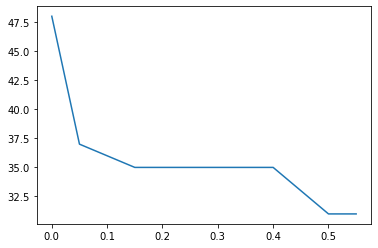

In [114]:
arange(0,0.56,0.05).size
#len(values)
plt.plot(arange(0,0.56,0.05),values)

In [115]:
# to recap we have removed columns which show little difference in the values.
# we now consider rows which are duplicates. This may well show littel information 
# if you have used raw data that may have duplicate entries, removing duplicate data 
# will be an important step in ensuring your data can be accurately used. Data Wrangling with PYthon 2016
# for this we will use the iris dataset 


In [120]:
df_raw_data_iris = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv', header =None)

In [121]:
df_raw_data_iris.shape

(150, 5)

In [122]:
df_raw_data_iris.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [123]:
df_raw_data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [125]:
df_raw_data_iris.duplicated().any()

True

In [126]:
# so there are rows which are duplicated 
dups = df_raw_data_iris.duplicated()

In [127]:
df_raw_data_iris[dups]

,0,1,2,3,4
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [128]:
df_raw_data_iris[dups].index

Int64Index([34, 37, 142], dtype='int64')

In [129]:
df_raw_data_iris.drop(df_raw_data_iris[dups].index,axis=0)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [130]:
df_raw_data_iris.drop_duplicates()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# as a summary we have looked at what numerical data columns and rows that need to be dropped 